# 1.3 Generalization - Can network fit random labels?

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from torch.autograd import Variable
import copy
torch.manual_seed(1)


In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.Compose([transforms.ToTensor(),]), download=True,)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.Compose([transforms.ToTensor(),]))

print("Training Dataset Size:", len(train_dataset),"\nTest Dataset Size:", len(test_dataset))

randomLabel = torch.tensor(np.random.randint(0, 10, (len(train_dataset)),))
train_dataset.targets = randomLabel

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

Training Dataset Size: 60000 
Test Dataset Size: 10000


In [3]:
class RMNIST(nn.Module):
    def __init__(self):
        super(RMNIST, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(model, optimizer, epoch, train_loader, interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    ncorrect = 0
    nsample = 0
    
    for i, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        prediction = model(data)
        loss = loss_fn(prediction, target)
        
        loss.backward()
        
        optimizer.step()

        _, predicted = torch.max(prediction.data, 1)
        nsample += target.size(0)
        ncorrect += (predicted == target).sum().item()
        acc = 100.0 * ncorrect / nsample
        
        if i % interval == 0:
            print (f'Train Log:Epoch: {epoch}, Step [{i+1}/{len(train_loader.dataset)}], TrainLoss: {loss.item():.4f}')
    return loss.data, round(acc,2)

def test(model, epoch, test_loader):
    test_load = test_loader
    model.eval()
    ncorrect = 0
    nsample = 0
    testLoss = 0
    count = 0
    
    with torch.no_grad():
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
    
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            _,predicted = torch.max(prediction.data, 1)
            nsample += labels.size(0)
            count += 1
            ncorrect += (predicted == labels).sum().item()
    
        t_loss = testLoss/count
        netTest_acc1 = 100.0 * ncorrect / nsample
        print(f'Accuracy of the network on the test images: {netTest_acc1}% & Test Loss: {t_loss}')
    return netTest_acc1, t_loss

rmnist = RMNIST()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rmnist.parameters(), lr=0.0001)

a=[]
for i in rmnist.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

train_loss_arr = []

t_loss_arr = []

epochArr = []
epochs = 1000
interval = 600
for epoch in range(1, epochs + 1):
    epochArr.append(epoch)
    loss, acc = train(rmnist, optimizer, epoch, train_loader, interval)
    train_loss_arr.append(loss.detach().numpy())
    testAcc,testloss = test(rmnist, epoch, test_loader)
    t_loss_arr.append(testloss)

Total no of parameters in Model 1: 397510
Train Log:Epoch: 1, Step [1/60000], TrainLoss: 2.2989
Accuracy of the network on the test images: 8.14% & Test Loss: 2.3057366824150085
Train Log:Epoch: 2, Step [1/60000], TrainLoss: 2.2994
Accuracy of the network on the test images: 9.99% & Test Loss: 2.3111984825134275
Train Log:Epoch: 3, Step [1/60000], TrainLoss: 2.3079
Accuracy of the network on the test images: 10.88% & Test Loss: 2.315399215221405
Train Log:Epoch: 4, Step [1/60000], TrainLoss: 2.2847
Accuracy of the network on the test images: 11.44% & Test Loss: 2.3164519381523134
Train Log:Epoch: 5, Step [1/60000], TrainLoss: 2.2747
Accuracy of the network on the test images: 12.72% & Test Loss: 2.3112175464630127
Train Log:Epoch: 6, Step [1/60000], TrainLoss: 2.3010
Accuracy of the network on the test images: 10.72% & Test Loss: 2.29564368724823
Train Log:Epoch: 7, Step [1/60000], TrainLoss: 2.2636
Accuracy of the network on the test images: 11.16% & Test Loss: 2.306191673278809
Train

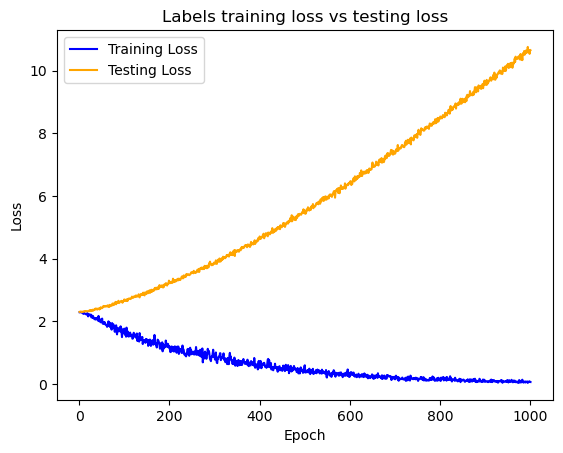

In [4]:
plt.plot(epochArr,train_loss_arr,color="blue")
plt.plot(epochArr,t_loss_arr,color="orange")
plt.legend(['Training Loss','Testing Loss'],loc="best")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Labels training loss vs testing loss",color = "black")
plt.show()

# 1.3 Generalization - Number of parameters v.s. Generalization


In [5]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

print("Training Dataset Size:", len(train_dataset),"\nTesting Dataset Size:", len(test_dataset))

Training Dataset Size: 60000 
Testing Dataset Size: 10000


In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

In [7]:
class M1(nn.Module):
    def __init__(self):
        super(M1, self).__init__()
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class M2(nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
class M3(nn.Module):
    def __init__(self,):
        super(M3, self).__init__()
        self.fc1 = nn.Linear(784, 250)
        self.fc2 = nn.Linear(250, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class M4(nn.Module):
    def __init__(self,):
        super(M4, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class M5(nn.Module):
    def __init__(self,):
        super(M5, self).__init__()
        self.fc1 = nn.Linear(784, 550)
        self.fc2 = nn.Linear(550, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class M6(nn.Module):
    def __init__(self,):
        super(M6, self).__init__()
        self.fc1 = nn.Linear(784, 750)
        self.fc2 = nn.Linear(750, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class M7(nn.Module):
    def __init__(self,):
        super(M7, self).__init__()
        self.fc1 = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
        
class M8(nn.Module):
    def __init__(self,):
        super(M8, self).__init__()
        self.fc1 = nn.Linear(784, 1050)
        self.fc2 = nn.Linear(1050, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class M9(nn.Module):
    def __init__(self,):
        super(M9, self).__init__()
        self.fc1 = nn.Linear(784, 1500)
        self.fc2 = nn.Linear(1500, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class M10(nn.Module):
    def __init__(self,):
        super(M10, self).__init__()
        self.fc1 = nn.Linear(784, 2000)
        self.fc2 = nn.Linear(2000, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
input_size = 784
max_epochs = 20
learning_rate = 0.0011
kernel_size = 4
num_epochs = 10
dropout = 0.25

In [9]:
def trainFunc(model,num_epochs):
    model.train()
    n_total_steps = len(train_loader)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_con =True
    epoch = 0
    train_avg_loss = []
    while not_con:
        epoch += 1
        ncorrect = 0
        nsample = 0
        lossSum = 0
        for i, (images, labels) in enumerate(train_loader):  
            prediction = model(images)
            loss = loss_func(prediction, labels)
            lossSum += loss.detach().numpy()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            _used, predicted = torch.max(prediction.data, 1)
            nsample += labels.size(0)
            ncorrect += (predicted == labels).sum().item()
            acc = 100.0 * ncorrect / nsample

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Accuracy : {acc} %', end = '\r', flush=True)
                train_epoch.append(epoch)
                train_losses.append(loss.item())
                train_acc.append(acc)


                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_con = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_con = False
                        
        train_avg_loss.append(lossSum/n_total_steps)
        
        
        print(f'For epoch {epoch} AVG_LOSS: {train_avg_loss[epoch-1]:.4f}',end = '\r', flush=True)
    return train_epoch,train_losses,train_acc,train_avg_loss

In [10]:
def testFunc(model): 
    model.eval()
    with torch.no_grad():
        ncorrect = 0
        nsample = 0
        testLoss = 0
        count = 0
        for images, labels in test_loader:
            prediction = model(images)
            tLoss = loss_func(prediction, labels)
            testLoss += tLoss
            _, predicted = torch.max(prediction.data, 1)
            nsample += labels.size(0)
            ncorrect += (predicted == labels).sum().item()
            count += 1

        testLoss /= count
        netTest_acc1 = 100.0 * ncorrect / nsample

        print(f'Accuracy of the network:{model._get_name()} on the test images: {netTest_acc1:.2f} % & loss of the network:{testLoss:.4f}')
        return netTest_acc1,testLoss

In [11]:
modelArr = [M1,M2,M3,M4,M5,M6,M7,M8,M9,M10]
allTrainLossVal = {}
allTrainAccVal = {}
allTestLossVal = {}
allTestAccVal = {}
allModelParamNo = {}
for i in range (len(modelArr)):
        j = copy.deepcopy(i)
        torch.manual_seed(1)
        j = modelArr[i]()

        loss_func = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(j.parameters(), lr=learning_rate) 

        a=[]
        for k in j.parameters():
            a.append(torch.numel(k))
        modelTotalPrams = np.sum(a)
        print(f'Total no of parameters in Model{j._get_name()} :{modelTotalPrams}')

        train_epoch,train_losses,train_acc,train_avg_loss = trainFunc(j,num_epochs)

        testAcc,testLoss = testFunc(j)

        allTrainLossVal[j._get_name()] = train_avg_loss
        allTrainAccVal[j._get_name()] = train_acc
        allTestLossVal[j._get_name()] = testLoss
        allTestAccVal[j._get_name()] = testAcc     
        allModelParamNo[j._get_name()] = modelTotalPrams

Total no of parameters in ModelM1 :39760
Max Epoch Reachedep [100/100], Loss: 0.1177, Accuracy : 95.825 %66666667 %
Accuracy of the network:M1 on the test images: 95.45 % & loss of the network:0.1515
Total no of parameters in ModelM2 :79510
Max Epoch Reachedep [100/100], Loss: 0.0818, Accuracy : 96.97833333333334 %
Accuracy of the network:M2 on the test images: 96.63 % & loss of the network:0.1163
Total no of parameters in ModelM3 :198760
Max Epoch Reachedep [100/100], Loss: 0.0770, Accuracy : 98.21 %666666667 %
Accuracy of the network:M3 on the test images: 97.43 % & loss of the network:0.0840
Total no of parameters in ModelM4 :397510
Max Epoch Reachedep [100/100], Loss: 0.0397, Accuracy : 98.89333333333333 %
Accuracy of the network:M4 on the test images: 97.68 % & loss of the network:0.0727
Total no of parameters in ModelM5 :437260
Max Epoch Reachedep [100/100], Loss: 0.0410, Accuracy : 98.95 %333333333 %
Accuracy of the network:M5 on the test images: 97.84 % & loss of the network:0.

In [12]:
model_TrainLoss = [np.min(allTrainLossVal['M1']),np.min(allTrainLossVal['M2']),
              np.min(allTrainLossVal['M3']),np.min(allTrainLossVal['M4']),
              np.min(allTrainLossVal['M5']),np.min(allTrainLossVal['M6']),
              np.min(allTrainLossVal['M7']),np.min(allTrainLossVal['M8']),
              np.min(allTrainLossVal['M9']),np.min(allTrainLossVal['M10'])     
            ]
model_Tparams = [allModelParamNo['M1'],allModelParamNo['M2'],allModelParamNo['M3'],
                allModelParamNo['M4'],allModelParamNo['M5'],allModelParamNo['M6'],
                allModelParamNo['M7'],allModelParamNo['M8'],allModelParamNo['M9'],
                allModelParamNo['M10']
                ]
model_Testloss = [allTestLossVal['M1'],allTestLossVal['M2'],allTestLossVal['M3'],allTestLossVal['M4'],allTestLossVal['M5'],
                  allTestLossVal['M6'],allTestLossVal['M7'],allTestLossVal['M8'],allTestLossVal['M9'],allTestLossVal['M10']     
                ]

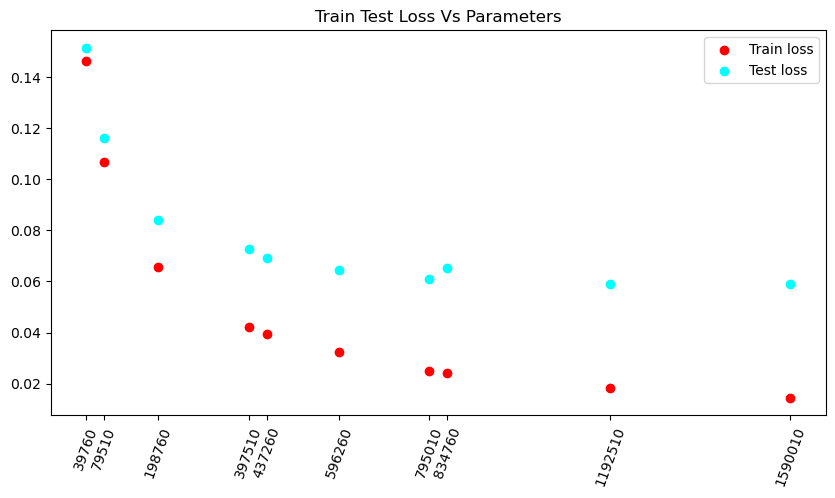

In [13]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.scatter(model_Tparams,model_TrainLoss,color="red")
plt.scatter(model_Tparams,model_Testloss,color="cyan")
plt.xticks(model_Tparams, model_Tparams,rotation=70)
plt.legend(['Train loss','Test loss'])
plt.title('Train Test Loss Vs Parameters')
plt.show()

In [14]:
model_TrainAcc= [np.max(allTrainAccVal['M1']),np.max(allTrainAccVal['M2']),
              np.max(allTrainAccVal['M3']),np.max(allTrainAccVal['M4']),
              np.max(allTrainAccVal['M5']),np.max(allTrainAccVal['M6']),
              np.max(allTrainAccVal['M7']),np.max(allTrainAccVal['M8']),
              np.max(allTrainAccVal['M9']),np.max(allTrainAccVal['M10'])     
                ]
model_TestAcc = [allTestAccVal['M1'],allTestAccVal['M2'],allTestAccVal['M3'],allTestAccVal['M4'],allTestAccVal['M5'],
                  allTestAccVal['M6'],allTestAccVal['M7'],allTestAccVal['M8'],allTestAccVal['M9'],allTestAccVal['M10']     
                ]

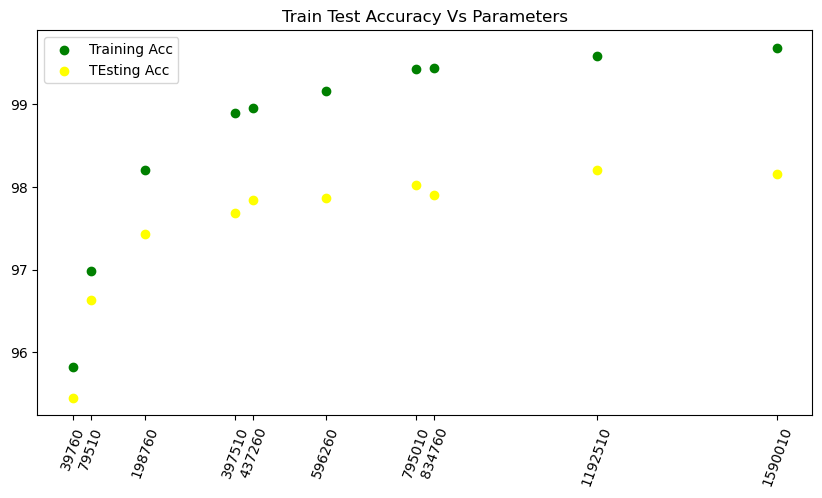

In [15]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.scatter(model_Tparams,model_TrainAcc,color="green")
plt.scatter(model_Tparams,model_TestAcc,color="yellow")
plt.xticks(model_Tparams, model_Tparams,rotation=70)
plt.legend(['Training Acc','TEsting Acc'])
plt.title('Train Test Accuracy Vs Parameters')
plt.show()

# 1.3 Generalization - Flatness v.s. Generalization part 1

In [16]:
class M1(nn.Module):
  def __init__(self,):
        super(M1, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        
  def forward(self, x):
        
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [17]:
def train_loader(batch_size):
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
    return train_loader

def test_loader(batch_size):
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
    return test_loader

In [18]:
def trainFunc(model,num_epochs,train_batch_size,status):
    model.train()
    print('started')
    train_load = train_loader(train_batch_size)
    n_total_steps = len(train_load)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_con =True
    epoch = 0
    train_avg_lossArr = []
    trainAvgAccArr = []

    while not_con:
        epoch += 1
        ncorrect = 0
        nsample = 0
        lossSum =0
        totalacc =0

        for i, (images, labels) in enumerate(train_load):  
            
            images, labels = Variable(images),Variable(labels)
            optimizer.zero_grad()
            prediction = model(images)
            loss = loss_func(prediction, labels)
            lossSum += loss.detach().numpy()
            loss.backward()
            
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            nsample += labels.size(0)
            ncorrect += (predicted == labels).sum().item()
            acc = 100.0 * ncorrect / nsample
            totalacc += acc

            train_losses.append(loss.item())
            train_acc.append(acc)
            train_epoch.append(epoch)

            if (i+1) % status == 0:
                print (f'Train O/P: Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}',end= '\r',flush = True)
   
                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_con = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_con = False

       
        epochAcc = totalacc/(i+1)
        train_avg_lossArr.append(lossSum/n_total_steps)    
        trainAvgAccArr.append(epochAcc)

    return train_epoch,train_losses,train_acc,train_avg_lossArr,trainAvgAccArr

In [19]:
torch.manual_seed(1)

learning_rate = 0.0015
mBatch1 = M1()
loss_func = nn.CrossEntropyLoss()
weight_decay_val = 1e-4

optimizer = torch.optim.Adam(mBatch1.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]
for i in mBatch1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={64} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=64 is:397510


In [20]:
max_epochs = 15
train_batch_size = 64
status = 500
B1_train_epoch,B1_train_losses,B1_train_acc,B1train_avg_lossArr,B1trainAvgAccArr  = trainFunc(mBatch1,max_epochs,train_batch_size,status)
     

started
Max Epoch Reached[15/15], Step [500/938], Loss: 0.0764


In [21]:
torch.manual_seed(1)

learning_rate = 0.0015
mBatch2 = M1()
loss_func = nn.CrossEntropyLoss()
weight_decay_val = 1e-4
optimizer = torch.optim.Adam(mBatch2.parameters(), lr=learning_rate, weight_decay=weight_decay_val) 
a=[]
for i in mBatch2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={1000} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=1000 is:397510


In [22]:
max_epochs = 15
train_batch_size = 1000
status = 5
B2_train_epoch,B2_train_losses,B2_train_acc,B2train_avg_lossArr,B2trainAvgAccArr = trainFunc(mBatch2,max_epochs,train_batch_size,status)
     

started
Max Epoch Reached[15/15], Step [5/60], Loss: 0.03324
Max Epoch Reached[15/15], Step [10/60], Loss: 0.0253
Max Epoch Reached[15/15], Step [15/60], Loss: 0.0261
Max Epoch Reached[15/15], Step [20/60], Loss: 0.0357
Max Epoch Reached[15/15], Step [25/60], Loss: 0.0291
Max Epoch Reached[15/15], Step [30/60], Loss: 0.0379
Max Epoch Reached[15/15], Step [35/60], Loss: 0.0320
Max Epoch Reached[15/15], Step [40/60], Loss: 0.0425
Max Epoch Reached[15/15], Step [45/60], Loss: 0.0365
Max Epoch Reached[15/15], Step [50/60], Loss: 0.0441
Max Epoch Reached[15/15], Step [55/60], Loss: 0.0302
Max Epoch Reached[15/15], Step [60/60], Loss: 0.0333


In [23]:
epochArr = np.array(np.linspace(1,max_epochs,max_epochs))


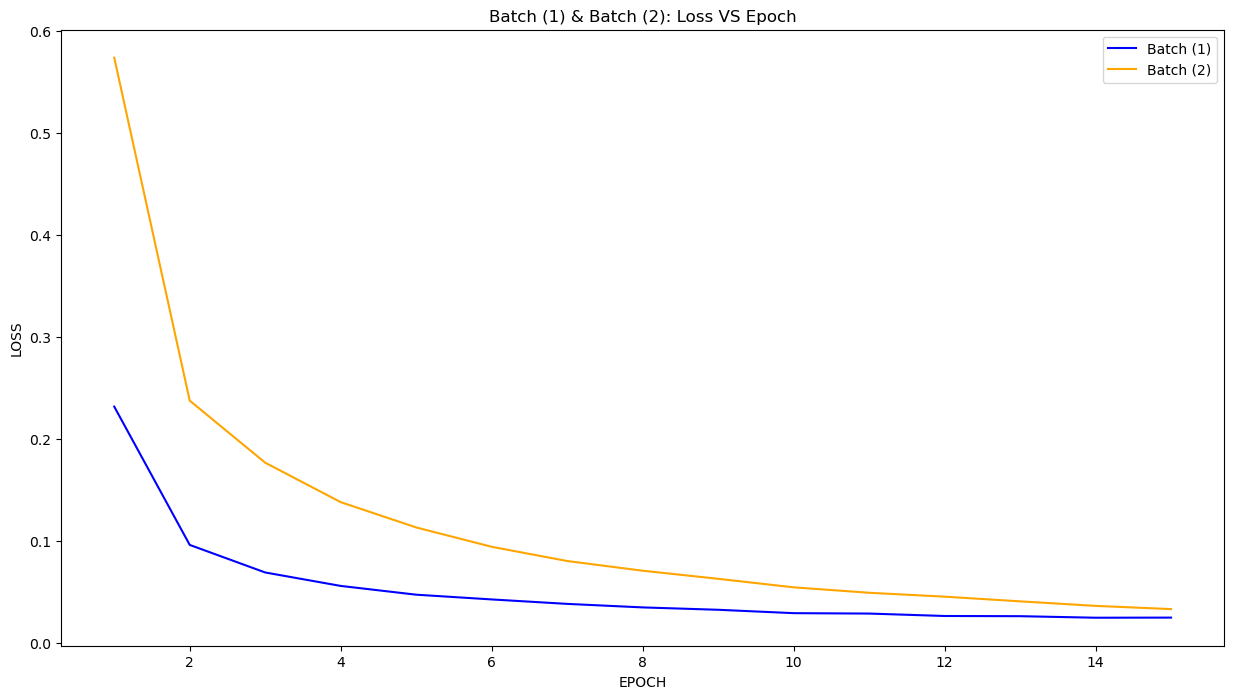

In [24]:
plt.figure(figsize=(15, 8))
plt.plot(epochArr,B1train_avg_lossArr,color="blue")
plt.plot(epochArr,B2train_avg_lossArr,color="orange")
plt.title('Batch (1) & Batch (2): Loss VS Epoch' ,color='black')
plt.legend(['Batch (1)','Batch (2)'])
plt.xlabel ('EPOCH')
plt.ylabel ('LOSS')
plt.show()

In [25]:
batch1_param = torch.nn.utils.parameters_to_vector(mBatch1.parameters())
print(batch1_param,'\nlen:',len(batch1_param))

tensor([ 2.3479e-37, -3.4748e-39, -2.3425e-38,  ..., -1.9976e-01,
         4.2178e-01,  8.1326e-02], grad_fn=<CatBackward0>) 
len: 397510


In [26]:
batch2_param = torch.nn.utils.parameters_to_vector(mBatch2.parameters())
print(batch2_param,'\nlen:',len(batch2_param))

tensor([ 4.2678e-23, -2.2518e-23, -2.0252e-23,  ...,  4.3990e-02,
        -2.9178e-02, -3.0045e-02], grad_fn=<CatBackward0>) 
len: 397510


In [27]:
alpha = np.linspace(-2.0, 2.0, num=31)
print(alpha)

[-2.         -1.86666667 -1.73333333 -1.6        -1.46666667 -1.33333333
 -1.2        -1.06666667 -0.93333333 -0.8        -0.66666667 -0.53333333
 -0.4        -0.26666667 -0.13333333  0.          0.13333333  0.26666667
  0.4         0.53333333  0.66666667  0.8         0.93333333  1.06666667
  1.2         1.33333333  1.46666667  1.6         1.73333333  1.86666667
  2.        ]


In [28]:
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    thetaArr.append(theta)

In [29]:
def testFunction(model,loss_func,testLoader,test_batch_size): 
    test_loader = testLoader
    test_load = test_loader(test_batch_size)
    model.eval()
    with torch.no_grad():
        ncorrect = 0
        nsample = 0
        testLoss = 0
        count =0
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
            
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            _, predicted = torch.max(prediction.data, 1)
            nsample += labels.size(0)
            ncorrect += (predicted == labels).sum().item()
            count +=1

    nett_loss = testLoss/count
    netTest_acc1 = 100.0 * ncorrect / nsample
    print(f'Accuracy of the network on the test images: {netTest_acc1} & Test Loss: {nett_loss} %', end="\r", flush= True)
    return netTest_acc1, nett_loss

In [30]:
modelsTrainEpochArr = []
modelsTrainLossArr = []
modelsTrainAccArr = []
modelsTestLossArr = []
modelsTestAccArr = []

for i in range (len(thetaArr)):
    
    j=copy.deepcopy(i) 
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    j = M1()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=0.0004, weight_decay = 1e-4)

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    max_epochs = 1
    train_batch_size = 500
    status = 100
    T_train_epoch,T_train_losses,T_train_acc,T_train_avg_lossArr,T_trainAvgAccArr = trainFunc(j,max_epochs,train_batch_size,status)
    
    modelsTrainLossArr.append(T_train_avg_lossArr)
    modelsTrainAccArr.append(T_trainAvgAccArr)
    
    test_batch_size=500
    T_acc, T_testLoss = testFunction(j,loss_func,test_loader,test_batch_size)
    modelsTestAccArr.append(T_acc)
    modelsTestLossArr.append(T_testLoss)

Total no of parameters in Model Theta 0 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
started
Max Epoch Reached[1/1], Step [100/120], Loss: 0.1792
Total no of parameters in Model Theta 1 is:397510 & Test Loss: 0.3015259905718267 %
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
started
Max Epoch Reached[1/1], Step [100/120], Loss: 0.0607
Total no of parameters in Model Theta 2 is:397510 & Test Loss: 0.26009572437033057 %
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
started
Max Epoch Reached[1/1], Step [100/120], Loss: 0.0436
Total no of parameters in Model Theta 3 is:397510& Test Loss: 0.22870691334828736 %
<bound method Modul

In [31]:
def meanScore(dataArr):
    meanModelData = []
    for i in range (len(dataArr)):
        meanScore = np.mean(dataArr[i])
        meanModelData.append(meanScore)
    return meanModelData

def minScore(dataArr):
    minModelScore = []
    for i in range (len(dataArr)):
        minScore = np.mean(dataArr[i])
        minModelScore.append(minScore)
    return minModelScore

def maxScore(dataArr):
    maxModelScore = []
    for i in range (len(dataArr)):
        maxScore = np.max(dataArr[i])
        maxModelScore.append(maxScore)
    return maxModelScore

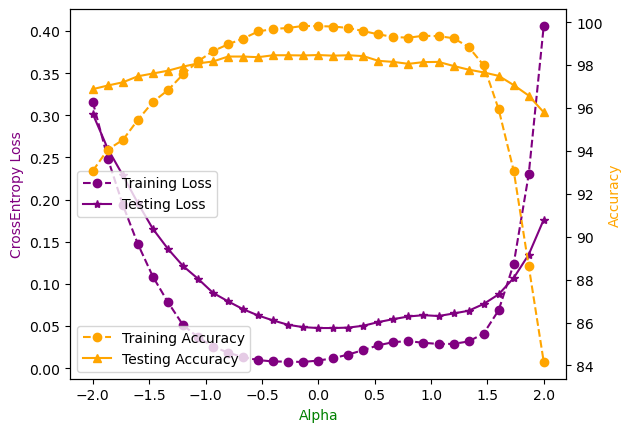

In [32]:
fig,ax=plt.subplots()
ax.plot(alpha,(modelsTrainLossArr),color="purple",linestyle='dashed', marker="o")
ax.plot(alpha,modelsTestLossArr,color="purple", marker="*")
ax.legend(['Training Loss','Testing Loss'],loc="center left")
ax.set_xlabel("Alpha",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "purple")


ax2=ax.twinx()
ax2.plot(alpha,(modelsTrainAccArr),color="orange",linestyle='dashed', marker="o")
ax2.plot(alpha,modelsTestAccArr,color="orange", marker="^")
ax2.set_xlabel("Alpha",color="Green")
ax2.set_ylabel("Accuracy",color = "orange")
ax2.legend(['Training Accuracy','Testing Accuracy'],loc="best")

plt.show()

In [33]:
torch.manual_seed(1)
learning_rate = 1e-3
mLr1 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr1.parameters(), lr=learning_rate) 

a=[]
for i in mLr1.parameters():
    a.append(torch.numel(i))
print(f'Total number of parameters in Model with Lr={learning_rate} is:{np.sum(a)}')

Total number of parameters in Model with Lr=0.001 is:397510


In [34]:
max_epochs = 5
train_batch_size = 64
status = 10
L1_train_epoch,L1_train_losses,L1_train_acc,L1_train_avg_lossArr,L1_trainAvgAccArr  = trainFunc(mLr1,max_epochs,train_batch_size,status)
     

started
Max Epoch Reached[5/5], Step [10/938], Loss: 0.01826
Max Epoch Reached[5/5], Step [20/938], Loss: 0.0214
Max Epoch Reached[5/5], Step [30/938], Loss: 0.0862
Max Epoch Reached[5/5], Step [40/938], Loss: 0.0472
Max Epoch Reached[5/5], Step [50/938], Loss: 0.0101
Max Epoch Reached[5/5], Step [60/938], Loss: 0.0202
Max Epoch Reached[5/5], Step [70/938], Loss: 0.0550
Max Epoch Reached[5/5], Step [80/938], Loss: 0.0664
Max Epoch Reached[5/5], Step [90/938], Loss: 0.0581
Max Epoch Reached[5/5], Step [100/938], Loss: 0.0173
Max Epoch Reached[5/5], Step [110/938], Loss: 0.0039
Max Epoch Reached[5/5], Step [120/938], Loss: 0.0388
Max Epoch Reached[5/5], Step [130/938], Loss: 0.0303
Max Epoch Reached[5/5], Step [140/938], Loss: 0.0370
Max Epoch Reached[5/5], Step [150/938], Loss: 0.0552
Max Epoch Reached[5/5], Step [160/938], Loss: 0.0370
Max Epoch Reached[5/5], Step [170/938], Loss: 0.0263
Max Epoch Reached[5/5], Step [180/938], Loss: 0.0316
Max Epoch Reached[5/5], Step [190/938], Loss: 

In [35]:
Lr1_param = torch.nn.utils.parameters_to_vector(mLr1.parameters())
print(Lr1_param,'\nlen:',len(Lr1_param))

tensor([ 0.0184, -0.0158, -0.0069,  ..., -0.0085,  0.0319, -0.0199],
       grad_fn=<CatBackward0>) 
len: 397510


In [36]:
torch.manual_seed(1)
learning_rate = 1e-2
mLr2 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr2.parameters(), lr=learning_rate) 

a=[]
for i in mLr2.parameters():
    a.append(torch.numel(i))
print(f'Total number of parameters in Model with Lr={learning_rate} is:{np.sum(a)}')

Total number of parameters in Model with Lr=0.01 is:397510


In [37]:
max_epochs = 5
train_batch_size = 64
status = 10
L2_train_epoch,L2_train_losses,L2_train_acc,L2_train_avg_lossArr,L2_trainAvgAccArr  = trainFunc(mLr2,max_epochs,train_batch_size,status)
     

started
Max Epoch Reached[5/5], Step [10/938], Loss: 0.03534
Max Epoch Reached[5/5], Step [20/938], Loss: 0.0539
Max Epoch Reached[5/5], Step [30/938], Loss: 0.1446
Max Epoch Reached[5/5], Step [40/938], Loss: 0.0394
Max Epoch Reached[5/5], Step [50/938], Loss: 0.0026
Max Epoch Reached[5/5], Step [60/938], Loss: 0.0029
Max Epoch Reached[5/5], Step [70/938], Loss: 0.1733
Max Epoch Reached[5/5], Step [80/938], Loss: 0.2381
Max Epoch Reached[5/5], Step [90/938], Loss: 0.0383
Max Epoch Reached[5/5], Step [100/938], Loss: 0.0894
Max Epoch Reached[5/5], Step [110/938], Loss: 0.0877
Max Epoch Reached[5/5], Step [120/938], Loss: 0.0729
Max Epoch Reached[5/5], Step [130/938], Loss: 0.0851
Max Epoch Reached[5/5], Step [140/938], Loss: 0.1023
Max Epoch Reached[5/5], Step [150/938], Loss: 0.6476
Max Epoch Reached[5/5], Step [160/938], Loss: 0.0680
Max Epoch Reached[5/5], Step [170/938], Loss: 0.0846
Max Epoch Reached[5/5], Step [180/938], Loss: 0.1157
Max Epoch Reached[5/5], Step [190/938], Loss: 

In [38]:
epochArr = np.array(np.linspace(1,max_epochs,max_epochs))


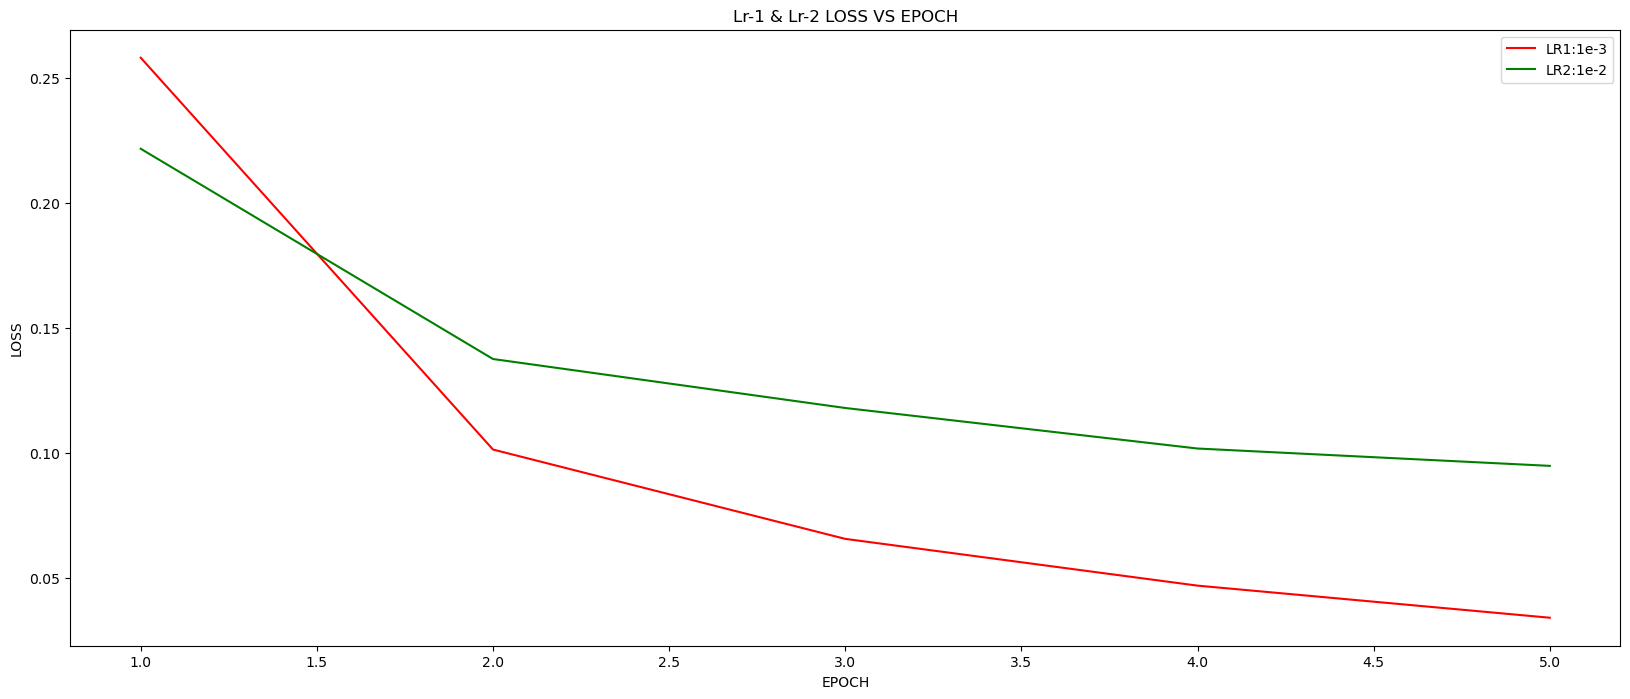

In [39]:
plt.figure(figsize=(20, 8))
plt.plot(epochArr,L1_train_avg_lossArr,color="red")
plt.plot(epochArr,L2_train_avg_lossArr,color="green")
plt.title('Lr-1 & Lr-2 LOSS VS EPOCH',color="black")
plt.legend(['LR1:1e-3','LR2:1e-2'])
plt.xlabel ('EPOCH')
plt.ylabel ('LOSS')
plt.show()


In [40]:
Lr2_param = torch.nn.utils.parameters_to_vector(mLr2.parameters())
print(Lr2_param,'\nlen:',len(Lr2_param))

tensor([ 0.0184, -0.0158, -0.0069,  ..., -1.0160,  1.6486,  0.2941],
       grad_fn=<CatBackward0>) 
len: 397510


In [41]:
modelsTrainEpochArr2 = []
modelsTrainLossArr2 = []
modelsTrainAccArr2 = []
modelsTestLossArr2 = []
modelsTestAccArr2 = []

for i in range (len(thetaArr)):
    torch.manual_seed(1)
    j=copy.deepcopy(i) 
    theta = (1-alpha[i])*Lr1_param + alpha[i]*Lr2_param
    j = M1()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3) 

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    max_epochs = 1
    train_batch_size = 1000
    status = 60
    T2_train_epoch,T2_train_losses,T2_train_acc,T2_train_avg_lossArr,T2_trainAvgAccArr = trainFunc(j,max_epochs,train_batch_size,status) 
    
    modelsTrainLossArr2.append(T2_train_avg_lossArr)
    modelsTrainAccArr2.append(T2_trainAvgAccArr)
    
    test_batch_size=1000
    T2_acc,T2_testLoss = testFunction(j,loss_func,test_loader,test_batch_size)
    modelsTestAccArr2.append(T2_acc)
    modelsTestLossArr2.append(T2_testLoss)

Total no of parameters in Model Theta 0 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
started
Max Epoch Reached[1/1], Step [60/60], Loss: 82.6715
Total no of parameters in Model Theta 1 is:397510 & Test Loss: 82.90622673034667 %
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
started
Max Epoch Reached[1/1], Step [60/60], Loss: 68.3566
Total no of parameters in Model Theta 2 is:397510 & Test Loss: 68.49610252380371 %
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
started
Max Epoch Reached[1/1], Step [60/60], Loss: 55.2739
Total no of parameters in Model Theta 3 is:397510 & Test Loss: 55.705725479125974 %
<bound method Module.para

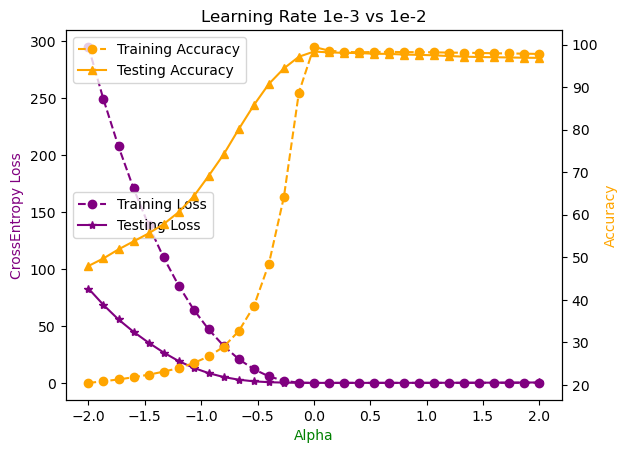

In [42]:
fig,ax=plt.subplots()
ax.plot(alpha,(modelsTrainLossArr2),color="purple",linestyle='dashed', marker="o")
ax.plot(alpha,modelsTestLossArr2,color="purple", marker="*")
ax.legend(['Training Loss','Testing Loss'],loc="center left")
ax.set_xlabel("Alpha",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "purple")
ax.set_title("Learning Rate 1e-3 vs 1e-2",color = "black")


ax2=ax.twinx()
ax2.plot(alpha,(modelsTrainAccArr2),color="orange",linestyle='dashed', marker="o")
ax2.plot(alpha,modelsTestAccArr2,color="orange", marker="^")
ax2.set_xlabel("Alpha",color="Green")
ax2.set_ylabel("Accuracy",color = "orange")
ax2.legend(['Training Accuracy','Testing Accuracy'],loc="best")

plt.show()

# 1.3 Generalization - Flatness v.s. Generalization part 2

In [43]:
class Model(nn.Module):
  def __init__(self,):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        
  def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [44]:
def trainFunc(model,num_epochs,train_batch_size):
    model.train()
    print('started')
    train_load = train_loader(train_batch_size)
    n_total_steps = len(train_load)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_con =True
    epoch = 0
    sensitivity=[]
    while not_con:
        epoch += 1
        ncorrect = 0
        nsample = 0
        lossSum =0
        for i, (images, labels) in enumerate(train_load):  
            images, labels = Variable(images),Variable(labels)
            
            optimizer.zero_grad()
            prediction = model(images)

            images.requires_grad = True
            loss = loss_func(prediction, labels)
            lossSum += loss

            loss.backward()
            optimizer.step()

            froGrad=0
            count =0 
            
            for p in model.parameters():
                grad = 0.0
                if p.grad is not None:
                    grad = p.grad
                    froGrad_norm = torch.linalg.norm(grad).numpy()
                    froGrad += froGrad_norm
                    count += 1
            
            sensitivity.append(froGrad/count)

            _, predicted = torch.max(prediction.data, 1)
            nsample += labels.size(0)
            ncorrect += (predicted == labels).sum().item()
            acc = 100.0 * ncorrect / nsample

            train_losses.append(loss.item())
            train_acc.append(acc)
            train_epoch.append(epoch)
        

            if (i+1) % 10 == 0:
                print (f'Train O/P: Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}',end= '\r',flush = True)
                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_con = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_con = False
                        
        train_avg_loss = lossSum/i+1
        print("Train Avg loss:",train_avg_loss)
                        
    return train_epoch,train_losses,train_acc,sensitivity,train_avg_loss

In [45]:
import copy


In [46]:
batchArr = np.linspace (10,1510,5)
print(batchArr)

[  10.  385.  760. 1135. 1510.]


In [47]:
def testFunction(model,loss_func,test_batch_size): 
    test_load = test_loader(test_batch_size)
    model.eval()
    with torch.no_grad():
        ncorrect = 0
        nsample = 0
        testLoss = 0
        count = 0
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
            
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            _, predicted = torch.max(prediction.data, 1)
            nsample += labels.size(0)
            ncorrect += (predicted == labels).sum().item()
            count += 1
    nett_loss = testLoss/count
    netTest_acc1 = 100.0 * ncorrect / nsample
    print(f'Accuracy of the network on the test images: {netTest_acc1}% & Testing Loss: {nett_loss} ',end= '\r',flush = True)
    return netTest_acc1, nett_loss

In [48]:
modelsTrainEpochArr = []
modelsTrainLossArr = []
modelsTrainAccArr = []
modelsTestLossArr = []
modelsTestAccArr = []
modelsSensitivityArr = []

temModel = Model ()

a=[]
for k in temModel.parameters():
    a.append(torch.numel(k))

print(f'Total number of parameters in Model :{np.sum(a)}')

for i in range (len(batchArr)):
    torch.manual_seed(1)
    
    j=copy.deepcopy(i) 
    j = Model()
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3, weight_decay= 1e-4)


    max_epochs = 5
    train_batch_size = int(batchArr[i])

    train_epoch,train_losses,train_acc,sensitivity,tvgLoss = trainFunc(j,max_epochs,train_batch_size)

    test_batch_size = int(batchArr[i])

    testAcc, testLoss = testFunction(j,loss_func,test_batch_size)

    
    modelsTrainEpochArr.append(train_epoch)
    modelsTrainLossArr.append(train_losses)
    modelsTrainAccArr.append(train_acc)
    modelsTestAccArr.append(testAcc)
    modelsTestLossArr.append(testLoss)
    modelsSensitivityArr.append(sensitivity)

Total number of parameters in Model :397510
started
Train Avg loss: tensor(1.1960, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0900, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0717, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0634, grad_fn=<AddBackward0>)
Max Epoch Reached[5/5], Step [10/6000], Loss: 0.0919
Max Epoch Reached[5/5], Step [20/6000], Loss: 0.0053
Max Epoch Reached[5/5], Step [30/6000], Loss: 0.0033
Max Epoch Reached[5/5], Step [40/6000], Loss: 0.0013
Max Epoch Reached[5/5], Step [50/6000], Loss: 0.0075
Max Epoch Reached[5/5], Step [60/6000], Loss: 0.0053
Max Epoch Reached[5/5], Step [70/6000], Loss: 0.0345
Max Epoch Reached[5/5], Step [80/6000], Loss: 0.0040
Max Epoch Reached[5/5], Step [90/6000], Loss: 0.1348
Max Epoch Reached[5/5], Step [100/6000], Loss: 0.1845
Max Epoch Reached[5/5], Step [110/6000], Loss: 0.0162
Max Epoch Reached[5/5], Step [120/6000], Loss: 0.0072
Max Epoch Reached[5/5], Step [130/6000], Loss: 0.1688
Max Epoch Reached[5/5], Step [140/6

In [50]:
def meanScore(dataArr):
    meanModelData = []
    for i in range (len(dataArr)):
        meanScore = np.mean(dataArr[i])
        meanModelData.append(meanScore)
    return meanModelData

def minScore(dataArr):
    minModelScore = []
    for i in range (len(dataArr)):
        minScore = np.mean(dataArr[i])
        minModelScore.append(minScore)
    return minModelScore

def maxScore(dataArr):
    maxModelScore = []
    for i in range (len(dataArr)):
        maxScore = np.max(dataArr[i])
        maxModelScore.append(maxScore)
    return maxModelScore

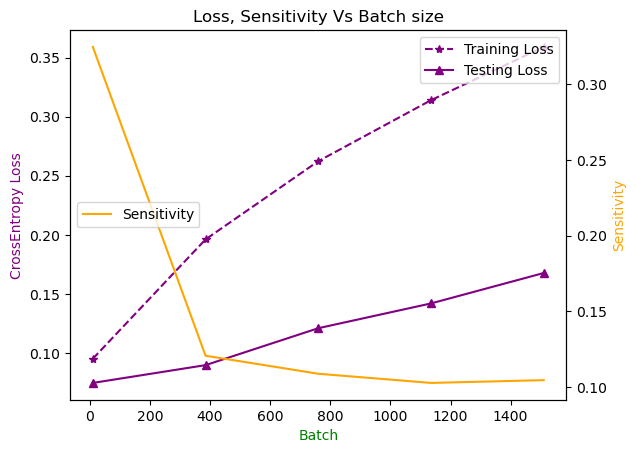

In [51]:
fig,ax=plt.subplots()
ax.plot(batchArr,minScore(modelsTrainLossArr),color="purple", marker="*",linestyle='dashed')
ax.plot(batchArr,modelsTestLossArr,color="purple", marker="^")
ax.legend(['Training Loss','Testing Loss'],loc="upper right")
ax.set_xlabel("Batch",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "purple")
ax.set_title("Loss, Sensitivity Vs Batch size",color="black")

ax2=ax.twinx()
ax2.plot(batchArr,minScore(modelsSensitivityArr),color="orange")
ax2.set_xlabel("Batch",color="Green")
ax2.set_ylabel("Sensitivity",color = "orange")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()
     

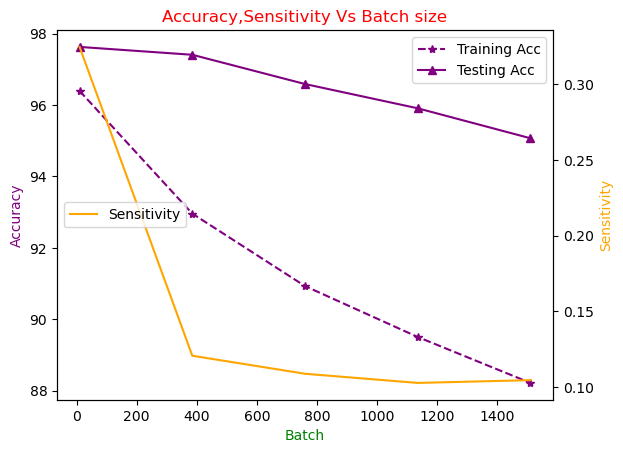

In [52]:
fig,ax=plt.subplots()
ax.plot(batchArr,minScore(modelsTrainAccArr),color="purple", marker="*",linestyle='dashed')
ax.plot(batchArr,modelsTestAccArr,color="purple", marker="^")
ax.legend(['Training Acc','Testing Acc'],loc="upper right")
ax.set_xlabel("Batch",color="Green")
ax.set_ylabel("Accuracy",color = "purple")
ax.set_title("Accuracy,Sensitivity Vs Batch size",color="red")

ax2=ax.twinx()
ax2.plot(batchArr,minScore(modelsSensitivityArr),color="orange")
ax2.set_xlabel("Batch",color="Green")
ax2.set_ylabel("Sensitivity",color = "orange")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()